In [17]:
import pandas as pd
import matplotlib.pyplot as plt


from dateutil.parser import parse

In [18]:
# %matplotlib

In [34]:
archivo = "../../data/fluke_30-06-2021_prueba01.csv"
def importa_fluke(archivo):
    tmp = pd.read_csv(archivo,usecols=[7,11],names=["fluke","tiempo"],skiprows=1)
    tmp.tiempo = pd.to_datetime(tmp.tiempo,dayfirst=True)
    tmp.set_index("tiempo",inplace=True)
    tmp.fluke = tmp.fluke.str.replace(" ppm","")
    tmp.fluke = tmp.fluke.astype("float64")
    return tmp


In [35]:
sensores = pd.read_csv("../../data/sensores_30-06-2021_03.csv",index_col=0,parse_dates=True)
# sensores.index = sensores.index + pd.Timedelta("2H")
sensores = sensores.resample("15S").mean()
# sensores.plot()

In [36]:
f1 = importa_fluke("../../data/fluke_30-06-2021_prueba01.csv")
f2 = importa_fluke("../../data/fluke_30-06-2021_prueba02.csv")
f3 = importa_fluke("../../data/fluke_30-06-2021_prueba03.csv")
f4 = importa_fluke("../../data/fluke_30-06-2021_prueba04.csv")
fluke = pd.concat([f1,f2,f3,f4],axis=0)
fluke = fluke.resample("15S").mean()
# fluke.plot()

In [38]:
datos = pd.concat([sensores,fluke],axis=1)
datos.columns

Index(['cdm4160', 'cjmcu811', 'mh-z14a', 's8lp', 'sen0219', 'sen0219cma',
       'sen0220', 't3022', 'fluke'],
      dtype='object')

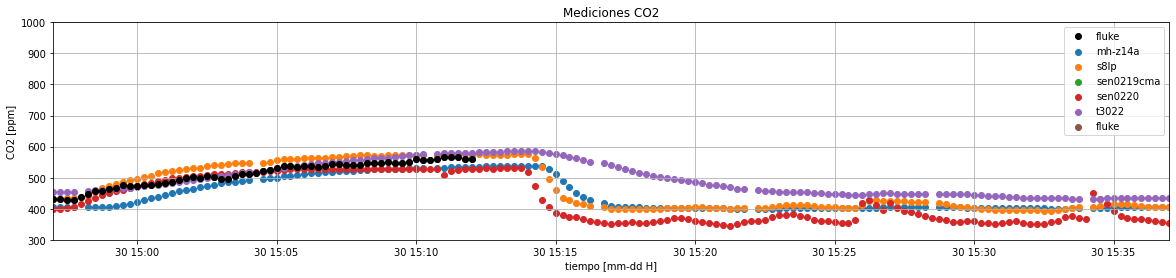

In [73]:
sensores = [ 'mh-z14a', 's8lp', 'sen0219cma','sen0220', 't3022', 'fluke']
# sensores eliminados 'cjmcu811',  'sen0219', 'cdm4160'
fig, ax = plt.subplots(figsize=(20,4))

fecha1 = parse("2021-06-30 14:57") 
fecha2 = fecha1 + pd.Timedelta("40Min")

ax.set_xlim(fecha1,fecha2)
ax.set_ylim(300,1000)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo [mm-dd H]")
ax.set_title("Mediciones CO2")
ax.plot(datos.fluke,"ko",label="fluke")
for sensor in sensores:
    ax.scatter(datos[sensor].index,datos[sensor],label=sensor)

ax.legend()
ax.grid()

<AxesSubplot:>

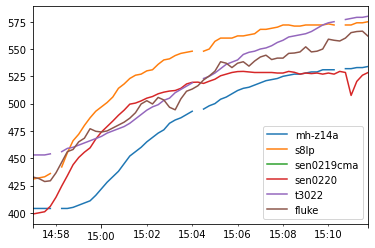

In [78]:
test550 = datos[sensores].loc["2021-06-30 14:57":"2021-06-30 15:11"]
test550.plot()
# test900.head()

<AxesSubplot:>

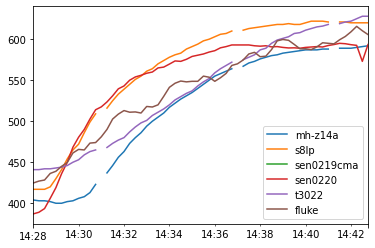

In [77]:
test600 = datos[sensores].loc["2021-06-30 14:28":"2021-06-30 14:42"]
test600.plot()
# test900.head()

<AxesSubplot:>

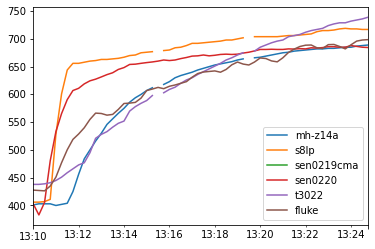

In [59]:
test700 = datos[sensores].loc["2021-06-30 13:10":"2021-06-30 13:24"]
test700.plot()
# test900.head()

<AxesSubplot:>

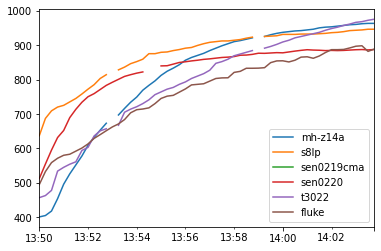

In [60]:
test900 = datos[sensores].loc["2021-06-30 13:50":"2021-06-30 14:03"]
test900.plot()
# test900.head()

In [79]:
test550.to_csv("../../data/test550_30-06-2021.csv")
test600.to_csv("../../data/test600_30-06-2021.csv")
test700.to_csv("../../data/test700_30-06-2021.csv")
test900.to_csv("../../data/test900_30-06-2021.csv")